<a href="https://colab.research.google.com/github/anand-therattil/Diabetes_Detection/blob/main/Diabeties_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn import svm

## Data Loading and Pre-Processing

In [2]:
drive.mount(r'/content/drive')
data = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Dataset/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.head()
# 0 Non Diabitec 
# 1 Diabetic 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [5]:
independent = data.drop(columns='Outcome',axis=1)
dependent = data['Outcome']

In [6]:
scaler = StandardScaler()
standard_data = scaler.fit_transform(independent)

## Plotting Data

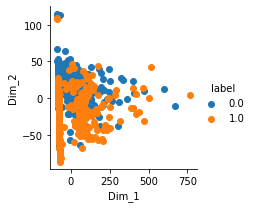

In [7]:
model = PCA(n_components = 2)  
PCA_data = model.fit_transform(independent)

PCA_data = np.vstack((PCA_data.T, dependent)).T
PCA_df = pd.DataFrame(data = PCA_data,
     columns =("Dim_1", "Dim_2", "label"))

sn.FacetGrid(PCA_df, hue ="label").map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

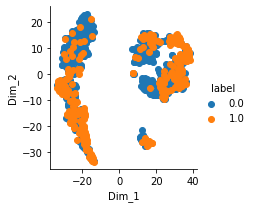

In [8]:
model = TSNE(n_components = 2, random_state = 0,learning_rate='auto',init='random')
tsne_data = model.fit_transform(independent)

tsne_data = np.vstack((tsne_data.T, dependent)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2","label"))


sn.FacetGrid(tsne_df, hue ="label").map(
        plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [9]:
from pandas.core.common import random_state
x_train,x_test,y_train,y_test = train_test_split(standard_data,dependent,test_size=0.2,random_state=1,stratify=dependent)

In [10]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [11]:
x_train_predict = model.predict(x_train)
train_accuracy = accuracy_score(x_train_predict,y_train)
print(train_accuracy*100)

78.33876221498372


In [12]:
x_test_predict = model.predict(x_test)
test_accuracy = accuracy_score(x_test_predict,y_test)
print(test_accuracy*100)

77.92207792207793


In [13]:
input = (0,157,100,35,168,43.1,2.288,40)
input = np.asarray(input)
input = input.reshape(1,-1)
input= scaler.fit_transform(input)
output = model.predict(input)
print(output)
if(output[0]):
  print("You have diabetis")
else:
  print("You are diabetis free")

[0]
You are diabetis free


### Using Logistic Regression 

In [14]:
model =LogisticRegression()
model.fit(x_train,y_train)
x_t_predict = model.predict(x_train)
training_acc = accuracy_score(x_t_predict,y_train)
print(training_acc*100)

78.66449511400651


In [15]:
x_t_predict = model.predict(x_test)
testing_acc = accuracy_score(x_t_predict,y_test)
print(testing_acc*100)

78.57142857142857


In [16]:
train_test_ratio = np.arange (0.1, 1, 0.1)
Logi_train_acc = []
Logi_test_acc =[]
svm_train_acc =[]
svm_test_acc=[]

In [17]:
for i in train_test_ratio:
  x_train,x_test,y_train,y_test = train_test_split(standard_data,dependent,test_size=i,random_state=1,stratify=dependent)
  
  model = svm.SVC(kernel='linear')
  model.fit(x_train,y_train)

  x_train_predict = model.predict(x_train)
  train_accuracy = accuracy_score(x_train_predict,y_train)

  x_test_predict = model.predict(x_test)
  test_accuracy = accuracy_score(x_test_predict,y_test)
  
  svm_train_acc.append(train_accuracy*100)
  svm_test_acc.append(test_accuracy*100)

  model =LogisticRegression()
  model.fit(x_train,y_train)
  x_t_predict = model.predict(x_train)
  train_acc = accuracy_score(x_t_predict,y_train)
  
  x_t_predict = model.predict(x_test)
  test_acc = accuracy_score(x_t_predict,y_test)
  
  Logi_train_acc.append(train_acc*100)
  Logi_test_acc.append(test_acc*100)


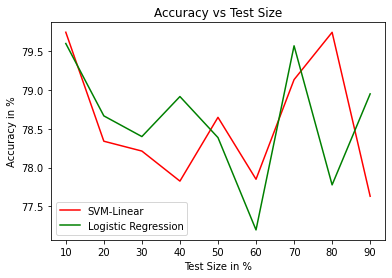

In [18]:
plt.plot(train_test_ratio*100,svm_train_acc , color='r', label='SVM-Linear')
plt.plot(train_test_ratio*100, Logi_train_acc, color='g', label='Logistic Regression')
plt.xlabel("Test Size in %")
plt.ylabel("Accuracy in %")
plt.title("Accuracy vs Test Size")
plt.legend()

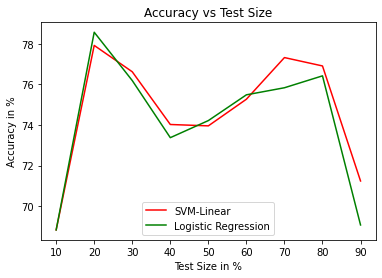

In [19]:
plt.plot(train_test_ratio*100,svm_test_acc , color='r', label='SVM-Linear')
plt.plot(train_test_ratio*100, Logi_test_acc, color='g', label='Logistic Regression')
plt.xlabel("Test Size in %")
plt.ylabel("Accuracy in %")
plt.title("Accuracy vs Test Size")
plt.legend()